# Applied Statistics - Project

### By Joanne Feeney
***

Project created with the help of Github Co-Pilot

Imports that will be used for this project.

In [1]:
# Imports
import math
import pandas as pd
import itertools
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

Reading in PlantGrowth R dataset.

In [2]:
# Load csv file
data=pd.read_csv("datasets\PlantGrowth.csv")

# Show
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Joanne Feeney\AppData\Local\Temp\ipykernel_9396\1163731148.py:2: SyntaxWarning: invalid escape sequence '\P'
  data=pd.read_csv("datasets\PlantGrowth.csv")


,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


"Dobson, A. J. (1983) An Introduction to Statistical Modelling. London: Chapman and Hall."

https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html

The dataset contains results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions. It contains two main variables, a treatment group and the weight of plants within those groups.

Describing the dataset

In [3]:
# Describe
data.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


The dataset has 30 cases & 2 variables

The groups variables are ‘ctrl’, ‘trt1’, and ‘trt2’

Testing whether it follows normal distribution

https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/

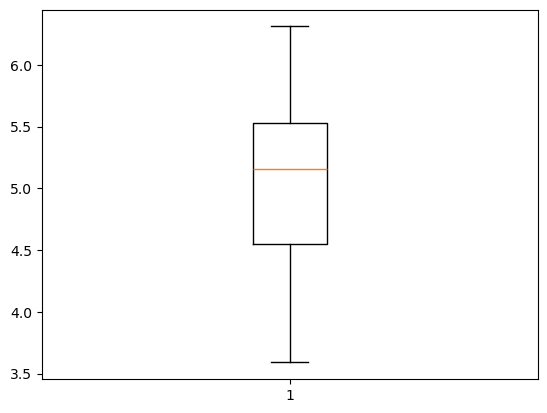

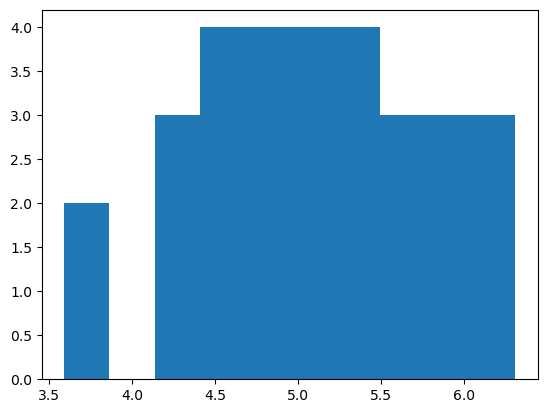

In [4]:
# Normality test
stats.shapiro(data["weight"])

# Boxplot
plt.boxplot(data["weight"])
plt.show()

# Histogram
plt.hist(data["weight"])
plt.show()

In [5]:
'''# QQ plot - NOT WORKING
sm.graphics.gofplots.qqplot(data["weight"], line='s')
plt.show()'''

'# QQ plot - NOT WORKING\nsm.graphics.gofplots.qqplot(data["weight"], line=\'s\')\nplt.show()'

https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

t-tests on this dataset 

In [6]:
# Group the data
grouped_data=data.groupby("group")
grouped_data.describe()

rownames                                                weight         \
         count  mean      std   min    25%   50%    75%   max  count   mean   
group                                                                         
ctrl      10.0   5.5  3.02765   1.0   3.25   5.5   7.75  10.0   10.0  5.032   
trt1      10.0  15.5  3.02765  11.0  13.25  15.5  17.75  20.0   10.0  4.661   
trt2      10.0  25.5  3.02765  21.0  23.25  25.5  27.75  30.0   10.0  5.526   

                                                    
            std   min     25%    50%     75%   max  
group                                               
ctrl   0.583091  4.17  4.5500  5.155  5.2925  6.11  
trt1   0.793676  3.59  4.2075  4.550  4.8700  6.03  
trt2   0.442573  4.92  5.2675  5.435  5.7350  6.31

In [7]:
# Get the groups
group1=data[data.group=="ctrl"]
group2=data[data.group=="trt1"]
group3=data[data.group=="trt2"]

In [8]:
# Perform t-test
stats.ttest_ind(group1.weight,group2.weight)
stats.ttest_ind(group1.weight,group3.weight)
stats.ttest_ind(group2.weight,group3.weight)

TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)

Results 

ANOVA on this dataset 

Boxplot